In [4]:
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick2_ohlc
import matplotlib.ticker as ticker
import os
import pandas as pd
import time
import numpy as np

def Drawing_Graph(Data_Frame, i, coins):
    df = Data_Frame[-60:]
    start = time.time()
    
    # 그래프 구역 나누기
    top_axes = plt.subplot(len(coins), 1, i+1)
    plt.xticks(rotation=45)
    plt.setp(top_axes.get_xticklabels(), visible=False) # top_axes의 라벨 제거
    #----------------------------------------------------------------------------------#

    # 인덱스 설정
    idx = df.index[:].astype('str')

    # 이동평균선 그리기
    top_axes.plot(idx, df['MA3'], label='MA3', linewidth=0.7)
    top_axes.plot(idx, df['MA5'], label='MA5', linewidth=0.7)
    top_axes.plot(idx, df['MA10'], label='MA10', linewidth=0.7)
    #----------------------------------------------------------------------------------#

    # 캔들차트 그리기
    candlestick2_ohlc(top_axes, df['open'], df['high'], 
                      df['low'], df['close'],
                      width=0.5, colorup='r', colordown='b')
    #----------------------------------------------------------------------------------#

    # 그래프 title 지정
    top_axes.set_title(f'{coins[n]}', fontsize=22)
    # X축 티커 숫자 20개로 제한
    top_axes.xaxis.set_major_locatr(ticker.MaxNLocator(10))

    top_axes.legend()
#     plt.tight_layout()

# 데이터 실시간 저장하기
def save_DataFrame(coin, interval, day_count):
    coin = coin            # 코인명
    interval = interval        # 차트의 종류 (minute1,3,5,10,15,30,60), day
    day_count = day_count           # 데이터 수
    
    if os.path.exists(os.path.join(os.getcwd(),'Data',f"{coin}.xlsx")):# data가 있을 경우
#         print("File exist.")
        pass
        return cal_data_different(coin, interval, day_count)

    else: # data 가 없을 경우
#         print("Create new Dataframe file")
        df = pyupbit.get_ohlcv(coin, count=day_count, interval=interval)
        time.sleep(0.1)
#         df = df.drop('value', axis=1)
        df = cal_indicators(df)
        df.to_excel(excel_writer=f"./Data/{coin}.xlsx")       # 엑셀 저장
#         print(f"{coin} Data is saved. . . ")
        return df

In [5]:
coins = ['KRW-BTC']
fig = plt.figure(figsize=(10,20)) # 실시간 차트 도화지 설정

while True:
    fig.clear()
    print("Real-time detection . . .")
    for n in range(len(coins)):
        coin = coins[n]
        df = save_DataFrame(coin,'minute1',60*24)
        Drawing_Graph(df, n, coins)
        time.sleep(0.1)
    plt.show(block = False)
    plt.pause(0.1)

Real-time detection . . .


NameError: name 'cal_data_different' is not defined

<Figure size 720x1440 with 0 Axes>

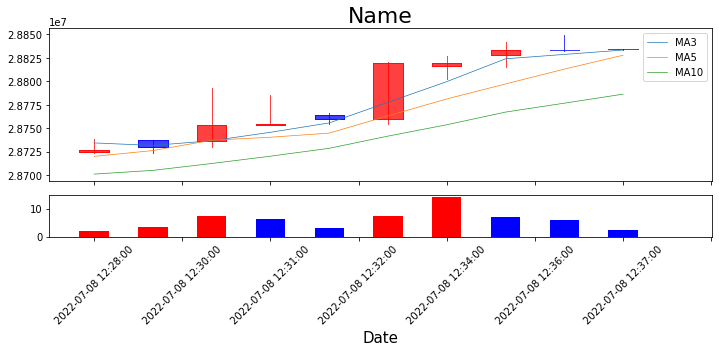

In [23]:
fig

In [24]:
fig.clear()

In [25]:
fig

<Figure size 720x360 with 0 Axes>

In [13]:
coins = ['KRW-SRM',
 'KRW-BTC']

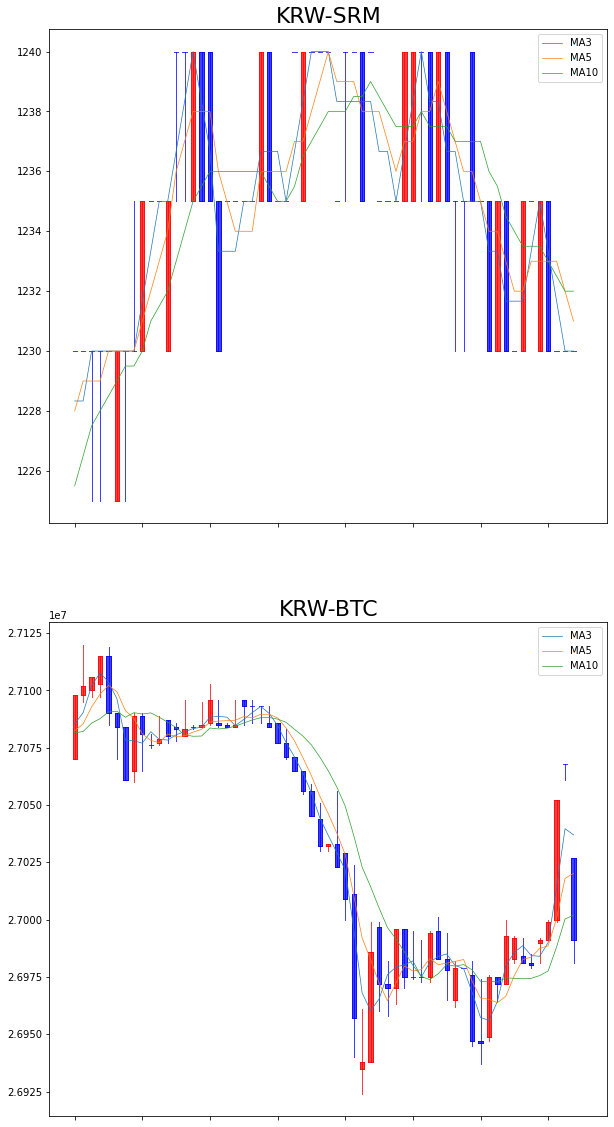

In [14]:
fig = plt.figure(figsize=(10,20))

fig.clear()
for n in range(len(coins)):
    coin = coins[n]
    df = pd.read_excel(f'./Data/{coin}.xlsx')
    Drawing_Graph(df, n, coins)
plt.draw()
plt.show()

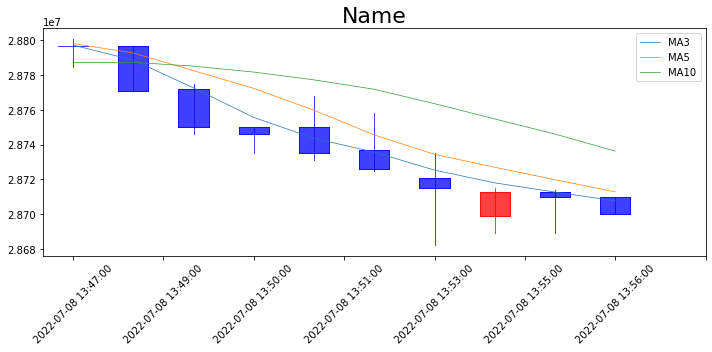

In [59]:
df = pd.read_excel('./Data/KRW-BTC.xlsx')
df = df[-10:]

start = time.time()
# 그래프 구역 나누기
fig = plt.figure(figsize=(10,5))
top_axes = plt.subplot(1, 1, 1)
plt.xticks(rotation=45)
#----------------------------------------------------------------------------------#

# 인덱스 설정
idx = df['Unnamed: 0'].astype('str')

# 이동평균선 그리기
top_axes.plot(idx, df['MA3'], label='MA3', linewidth=0.7)
top_axes.plot(idx, df['MA5'], label='MA5', linewidth=0.7)
top_axes.plot(idx, df['MA10'], label='MA10', linewidth=0.7)
#----------------------------------------------------------------------------------#

# 캔들차트 그리기
candlestick2_ohlc(top_axes, df['open'], df['high'], 
                  df['low'], df['close'],
                  width=0.5, colorup='r', colordown='b')

#----------------------------------------------------------------------------------#

# 그래프 title 지정
top_axes.set_title(f'Name', fontsize=22)
# X축 티커 숫자 20개로 제한
top_axes.xaxis.set_major_locator(ticker.MaxNLocator(10))

top_axes.legend()
plt.tight_layout()